# Изучение рынка заведений общественного питания Москвы

- Автор: Григорьев Константин
- Дата: 11.01.2024г.

### Цели и задачи проекта

<font color='#777778'>В этом блоке перечислите цель проекта и те задачи, которые вы решаете. Можно использовать описания проекта, но будет полезно, если вы сформулируете основную цель проекта самостоятельно.</font>

Инвесторы из фонда Shut Up and Take My Money решили попробовать себя в новой области и открыть заведение общественного питания в Москве. Заказчики ещё не знают, что это будет за место: кафе, ресторан или бар. Расположение, меню и цены пока тоже обсуждаются. Для начала заказчики просят провести исследовательский анализ рынка Москвы. Эти результаты помогут в выборе подходящего инвесторам места.

Доступен датасет с заведениями общественного питания Москвы, составленный на основе данных сервисов Яндекс Карты и Яндекс Бизнес на лето 2022 года. Информация, размещённая в сервисе Яндекс Бизнес, могла быть добавлена пользователями или найдена в общедоступных источниках. Она носит исключительно справочный характер.

### Описание данных

<font color='#777778'>Здесь приведите описание данных.</font>

Файл `/datasets/rest_info.csv` содержит информацию о заведениях общественного питания:
- `name` — название заведения;
- `address` — адрес заведения;
- `district` — административный район, в котором находится заведение, например Центральный административный округ;
- `category` — категория заведения, например «кафе», «пиццерия» или «кофейня»;
- `hours` — информация о днях и часах работы;
- `rating` — рейтинг заведения по оценкам пользователей в Яндекс Картах (высшая оценка — 5.0);
- `chain` — число, выраженное 0 или 1, которое показывает, является ли заведение сетевым (для маленьких сетей могут встречаться ошибки):
  - `0` — заведение не является сетевым;
  - `1` — заведение является сетевым.
- `seats` — количество посадочных мест.

Файл `/datasets/rest_price.csv` содержит информацию о среднем чеке в заведениях общественного питания:
- `price` — категория цен в заведении, например «средние», «ниже среднего», «выше среднего» и так далее;
- `avg_bill` — строка, которая хранит среднюю стоимость заказа в виде диапазона, например:
   - «Средний счёт: 1000–1500 ₽»;
   - «Цена чашки капучино: 130–220 ₽»;
   - «Цена бокала пива: 400–600 ₽».
   - и так далее;
- `middle_avg_bill` — число с оценкой среднего чека, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Средний счёт»:
   - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
   - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
   - Если значения нет или оно не начинается с подстроки «Средний счёт», то в столбец ничего не войдёт.
- `middle_coffee_cup` — число с оценкой одной чашки капучино, которое указано только для значений из столбца `avg_bill`, начинающихся с подстроки «Цена одной чашки капучино»:
   - Если в строке указан ценовой диапазон из двух значений, в столбец войдёт медиана этих двух значений.
   - Если в строке указано одно число — цена без диапазона, то в столбец войдёт это число.
   - Если значения нет или оно не начинается с подстроки «Цена одной чашки капучино», то в столбец ничего не войдёт.

### Содержимое проекта

<font color='#777778'>Перечислите основные шаги проекта или напишите оглавление. Используйте описание проекта, чтобы зафиксировать основные шаги.</font>

- Шаг 1. Загрузка данных и знакомство с ними
- Шаг 2. Предобработка данных
- Шаг 3. Исследовательский анализ данных
- Шаг 4. Итоговый вывод и рекомендации

---

## 1. Загрузка данных и знакомство с ними

- Загрузите данные о заведениях общественного питания Москвы. Путь к файлам: `/datasets/rest_info.csv` и `/datasets/rest_price.csv`.

- Познакомьтесь с данными и изучите общую информацию о них.

In [1]:
# Импортируем библиотеки
import pandas as pd

# Загружаем библиотеки для визуализации данных
import matplotlib.pyplot as plt
import seaborn as sns

# Загружаем библиотеку для расчёта коэффициента корреляции phi_k
!pip install phik
from phik import phik_matrix


     |████████████████████████████████| 686 kB 1.1 MB/s eta 0:00:01


In [2]:
# Выгружаем данные в переменные info_df и price_df
info_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_info.csv')
price_df = pd.read_csv('https://code.s3.yandex.net/datasets/rest_price.csv')

In [3]:
# Выведем первые 5 строк датасета info_df
info_df.head()

,id,name,category,address,district,hours,rating,chain,seats
0,0c3e3439a8c64ea5bf6ecd6ca6ae19f0,WoWфли,кафе,"Москва, улица Дыбенко, 7/1",Северный административный округ,"ежедневно, 10:00–22:00",5.0,0,NaN
1,045780ada3474c57a2112e505d74b633,Четыре комнаты,ресторан,"Москва, улица Дыбенко, 36, корп. 1",Северный административный округ,"ежедневно, 10:00–22:00",4.5,0,4.0
2,1070b6b59144425896c65889347fcff6,Хазри,кафе,"Москва, Клязьминская улица, 15",Северный административный округ,"пн-чт 11:00–02:00; пт,сб 11:00–05:00; вс 11:00...",4.6,0,45.0
3,03ac7cd772104f65b58b349dc59f03ee,Dormouse Coffee Shop,кофейня,"Москва, улица Маршала Федоренко, 12",Северный административный округ,"ежедневно, 09:00–22:00",5.0,0,NaN
4,a163aada139c4c7f87b0b1c0b466a50f,Иль Марко,пиццерия,"Москва, Правобережная улица, 1Б",Северный административный округ,"ежедневно, 10:00–22:00",5.0,1,148.0


In [4]:
# Выведем основную информацию о датасете info_df
info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8406 entries, 0 to 8405
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        8406 non-null   object 
 1   name      8406 non-null   object 
 2   category  8406 non-null   object 
 3   address   8406 non-null   object 
 4   district  8406 non-null   object 
 5   hours     7870 non-null   object 
 6   rating    8406 non-null   float64
 7   chain     8406 non-null   int64  
 8   seats     4795 non-null   float64
dtypes: float64(2), int64(1), object(6)
memory usage: 591.2+ KB


Датасет `/datasets/rest_info.csv` содержит 9 столбцов и 8406 строк, в которых представлена информация о заведениях общественного питания Москвы.

После первичного анализа данных можно сделать следующие выводы:

Данные в столбцах `id`, `name`, `category`, `adress`, `district`, `hours` хранятся в типе `object`. Значения в столбцах `rating`, `seats` представлены в типе `float64`. Столбец `chain` представлен целыми числами и показывает является ли ресторан сетевым или нет, и содержит значения 1 или 0 — размерность этих данных можно оптимизировать.
Пропуски содержатся только в столбцах `hours`, `seats`. 

Перейдем к следующему датасету `/datasets/rest_price.csv` и выведем основную информацию:

In [5]:
#Выведем первые 10 строк датасета price_df
price_df.head(10)

,id,price,avg_bill,middle_avg_bill,middle_coffee_cup
0,045780ada3474c57a2112e505d74b633,выше среднего,Средний счёт:1500–1600 ₽,1550.0,NaN
1,1070b6b59144425896c65889347fcff6,средние,Средний счёт:от 1000 ₽,1000.0,NaN
2,03ac7cd772104f65b58b349dc59f03ee,NaN,Цена чашки капучино:155–185 ₽,NaN,170.0
3,a163aada139c4c7f87b0b1c0b466a50f,средние,Средний счёт:400–600 ₽,500.0,NaN
4,8a343546b24e4a499ad96eb7d0797a8a,средние,NaN,NaN,NaN
5,96ebceb1a09e4e3191133b9fe0379a64,средние,Средний счёт:199 ₽,199.0,NaN
6,0243288b78024af090b8e947842c969c,средние,Средний счёт:200–300 ₽,250.0,NaN
7,36aeb0ffa69c48fdb0021549520deb10,средние,Средний счёт:от 500 ₽,500.0,NaN
8,487167877eb04288bc90d4fa80646fc2,средние,Средний счёт:1000–1200 ₽,1100.0,NaN
9,ac32978af97641bfacf996e7f5a50ee5,средние,Цена бокала пива:250–350 ₽,NaN,NaN


In [6]:
#Выведем основную информацию о датасете price_df
price_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4058 entries, 0 to 4057
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 4058 non-null   object 
 1   price              3315 non-null   object 
 2   avg_bill           3816 non-null   object 
 3   middle_avg_bill    3149 non-null   float64
 4   middle_coffee_cup  535 non-null    float64
dtypes: float64(2), object(3)
memory usage: 158.6+ KB


Датасет `/datasets/rest_price.csv` содержит 5 столбцов и 4058 строк, в которых представлена информация о ценах и среднем чеке.
Столбцы `id`, `price`, `avg_bill` имеют тип `object` и являются корректными для этих данных. Столбцы `middle_avg_bill`, `middle_avg_bill` хранят информацию из столбца `avg_bill` о цене и для них тип `float64` тоже является корректным.
Пропуски есть в столбцах `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`.


---

### Промежуточный вывод

Сделайте промежуточный вывод о полученных данных: данные какого объёма вам предоставили, соответствуют ли данные описанию, встречаются ли в них пропуски, используются ли верные типы данных. Отметьте другие особенности данных, которые вы обнаружите на этой стадии и на которые стоит обратить внимание при предобработке.

Были загруженны данные двух датасетов и выведена основная информация по каждому из них. Датасет `/datasets/rest_info.csv` содержит 9 столбцов и 8406 строк, а датасет `/datasets/rest_price.csv` содержит 5 столбцов и 4058 строк и занимают 591.2+ KB и 158.6+ KB памяти соответсвенно. 

Пропуски есть в столбцах `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` датасета `/datasets/rest_price.csv` и `hours`, `seats` датасета `/datasets/rest_info.csv`.

Столбцы хранятся в типах подходящих для последующего анализа, столбец `chain` можно оптимизировать, чтобы он меньше занимал памяти до `int8`.

На основе столбца `avg_bill` в датасете `/datasets/rest_price.csv` добавлены столбцы `middle_avg_bill`, `middle_coffee_cup`, но для категории баров в данных пропуски, можно создать дополнительно столбец, который выделит из столбца `avg_bill` цену за пиво, для категории баров. 

### Подготовка единого датафрейма

- Объедините данные двух датасетов в один, с которым вы и продолжите работу.

In [7]:
# Объеденим данные в один датасет
df = info_df.merge(price_df, how='left', on='id')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8406 entries, 0 to 8405
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 8406 non-null   object 
 1   name               8406 non-null   object 
 2   category           8406 non-null   object 
 3   address            8406 non-null   object 
 4   district           8406 non-null   object 
 5   hours              7870 non-null   object 
 6   rating             8406 non-null   float64
 7   chain              8406 non-null   int64  
 8   seats              4795 non-null   float64
 9   price              3315 non-null   object 
 10  avg_bill           3816 non-null   object 
 11  middle_avg_bill    3149 non-null   float64
 12  middle_coffee_cup  535 non-null    float64
dtypes: float64(4), int64(1), object(8)
memory usage: 919.4+ KB


## 2. Предобработка данных

Подготовьте данные к исследовательскому анализу:

- Изучите корректность типов данных и при необходимости проведите их преобразование.

Столбцы `id` , `name`, `category`, `adress`, `district`, `hours`, `price`, `avg_bill` хранятся в типе `object` и подходят для анализа данных.
Столбцы `rating`, `middle_avg_bill`, `middle_coffee_cup` хранят данные о рейтинге и финансовых показателях и для них тип `float64` будет верным. 
Столбцы `chain`, `seats` необходимо преобразовать, т.к. `chain` хранит данные о наличии или отсутсвии сетевого заведения, т.е. 1 или 0 и его можно оптимизировать, а столбец `seats` хранит данные о кол-во посадочных мест и для него тип с плавающей точкой не подходит, его нужно преобразовать в `int`, но так как в данных есть пропуски, выполнить преобразование не получится, для этого нужно заменить все пропуски в этом столбце на какие-нибудь значения. 


In [9]:
#Приведем столбец chain в тип данных int
for column in ['chain']:
    df[column] = pd.to_numeric(df[column], errors='coerce', downcast='integer')

In [10]:
# Проверим результат преобразования
df.dtypes

id                    object
name                  object
category              object
address               object
district              object
hours                 object
rating               float64
chain                   int8
seats                float64
price                 object
avg_bill              object
middle_avg_bill      float64
middle_coffee_cup    float64
dtype: object

- Изучите пропущенные значения в данных: посчитайте их количество в каждом столбце датафрейме, изучите данные с пропущенными значениями и предположите гипотезы их появления. Проведите обработку пропущенных значений: вы можете заменить пропуски на определённое значение, удалить строки с пропусками или оставить их как есть.

In [11]:
# Выводим количество пропущенных строк в датафрейме
df.isna().sum()

id                      0
name                    0
category                0
address                 0
district                0
hours                 536
rating                  0
chain                   0
seats                3611
price                5091
avg_bill             4590
middle_avg_bill      5257
middle_coffee_cup    7871
dtype: int64

In [12]:
# Подсчитываем процент строк с пропусками
df.isna().sum() / len(df) * 100

id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
hours                 6.376398
rating                0.000000
chain                 0.000000
seats                42.957411
price                60.563883
avg_bill             54.603854
middle_avg_bill      62.538663
middle_coffee_cup    93.635498
dtype: float64

Столбец `hours` содержит всего лишь 6% пропусков - и для этого столбца пропуски не являются типичными и чтобы их заменить необходимы точные данные, поэтому принято решение удалить эти пропуски, чтобы они негативно не влияли на дальнейший анализ. 

Столбец `seats` почти 43% пропусков - возможно, что почти половина пропусков это нормально для этого столбца, так как у некоторых груп рестораннов может не быть посадочных мест, например часто для кофеен посадочные места отсутсвуют.

Пропуски в столбцах `price` скорее всего тоже являются нормальными для данного набора данных, т.к. показывает категорию цен для одного заведения и в некоторых заведениях цены могут разниться или в предложении, например, только пиво. 

Пропуски в столбце `avg_bill` можно оставить без изменений, т.к. в дальнейшем анализе участвовать он не будет.

Пропуски в столбце `middle_cofee_cup` и `middle_avg_bill` можно также оставить без изменений, так как эти столбцы созданы на основе `avg_bill` и для разных категорий заведений, данные могу отсутствовать. 






- Проверьте данные на явные и неявные дубликаты, например поля с названием и адресом заведения. Для оптимизации проверки нормализуйте данные в текстовых столбцах, например с названием заведения.

In [13]:
# Приведем столбец name к нижнему регистру
df['name'] = df['name'].str.lower()

In [14]:
# Приведем столбец address к нижнему регистру
df['address'] = df['address'].str.lower()

In [15]:
# Приведем столбец district к нижнему регистру
df['district'] = df['district'].str.lower()

In [16]:
# Проверяем полные дубликаты в датафрейме df
df.duplicated().sum()

0

Думбликатов не найдено

In [17]:
# Проверяем неявные дубликаты в датафрейме df по столбцу id
df.duplicated(subset='id').sum()

0

In [18]:
# Проверяем неявные дубликаты в датафрейме df по столбцам name, address, district
df.duplicated(subset=['name','address','district']).sum()

4

Найдено 4 дублирующие строки

In [19]:
# считаем кол-во строк до удаления дубликатов
initial_row_count = df.shape[0]

# Сортируем датафрейм по всем столбцам
df_sorted = df.sort_values(by=list(df.columns))

# Удаляем дубликаты
df_no_duplicates = df_sorted.drop_duplicates(subset=['name','address','district'])

# Сохраняем количество строк после удаления дубликатов
final_row_count_dup = df_no_duplicates.shape[0]

# абсолютное кол-во дубликатов
abs_duplicates = initial_row_count - final_row_count_dup

# относительное кол-во дубликатов
percent_duplicates = round(100 - ((final_row_count_dup / initial_row_count) * 100),2)


# Выводим результаты
print(f"Количество строк до удаления дубликатов: {initial_row_count}")
print(f"Количество строк после удаления дубликатов: {final_row_count_dup}")
print(f"Количество удаленых дубликатов: {abs_duplicates}")
print(f"Процент удаленных строк: {percent_duplicates}%")


Количество строк до удаления дубликатов: 8406
Количество строк после удаления дубликатов: 8402
Количество удаленых дубликатов: 4
Процент удаленных строк: 0.05%


- Для дальнейшей работы создайте столбец `is_24_7` с обозначением того, что заведение работает ежедневно и круглосуточно, то есть 24/7:
  - логическое значение `True` — если заведение работает ежедневно и круглосуточно;
  - логическое значение `False` — в противоположном случае.

In [20]:
# Создадим новый датасет после удаления дубликатов и пропусков для дальнейшего анализа
new_df = df_no_duplicates.copy()

In [21]:
# Создадим новый столбец is_24_7 для дальнейшего анализа
new_df['is_24_7'] = (new_df['hours'].str.contains('ежедневно')) & (new_df['hours'].str.contains('круглосуточно'))

In [22]:
# Подсчитываем процент строк с пропусками после удаления пропусков в hours и удаления дубликатов
new_df.isna().sum() / len(df) * 100

id                    0.000000
name                  0.000000
category              0.000000
address               0.000000
district              0.000000
hours                 6.364502
rating                0.000000
chain                 0.000000
seats                42.945515
price                60.516298
avg_bill             54.556269
middle_avg_bill      62.491078
middle_coffee_cup    93.587913
is_24_7               0.000000
dtype: float64

---

### Промежуточный вывод

После предобработки данных напишите промежуточный вывод о проведённой работе. Отразите количество или долю отфильтрованных данных, если вы что-то удаляли.

В исходном датасете было 8406 строки после объединения, всего было найдено 4 дублирующих строки по столбцам `name`,`address`,`district`, что составило 0,05% от исходного количества данных. 

Так же были найдены пропуски в данных по столбцам `hours`, `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup`.
В столбце `hours` было принято решение удалить пропуски, потому что заполнить их нельзя, т.к. нет полных данных, чтобы эти пропуски не влияли на дальнейший анализ. 

Пропуски в столбце `hours` составляют значительную часть данных, их лучше оставить как есть.

В столбцах `seats`, `price`, `avg_bill`, `middle_avg_bill`, `middle_coffee_cup` было принято решение оставить пропуски как есть.

Процент пропусков в этих данных составляет :

- seats                42%
- price                560%
- avg_bill             54%
- middle_avg_bill      62%
- middle_coffee_cup    93%

## 3. Исследовательский анализ данных
Проведите исследовательский анализ исходных данных.

При исследовании данных используйте визуализации. Проверьте, что для каждого случая подобран оптимальный тип визуализации с корректным оформлением. У графика должен быть заголовок, понятные подписи по осям, при необходимости легенда, а его размер является оптимальным для изучения.

После исследования каждого пункта оставляйте небольшой комментарий с выводом или обсуждением результата. В конце шага обобщите результаты, выделив, по вашему мнению, самые важные.

---

### Задача 1

Какие категории заведений представлены в данных? Исследуйте количество объектов общественного питания по каждой категории. Результат сопроводите подходящей визуализацией.

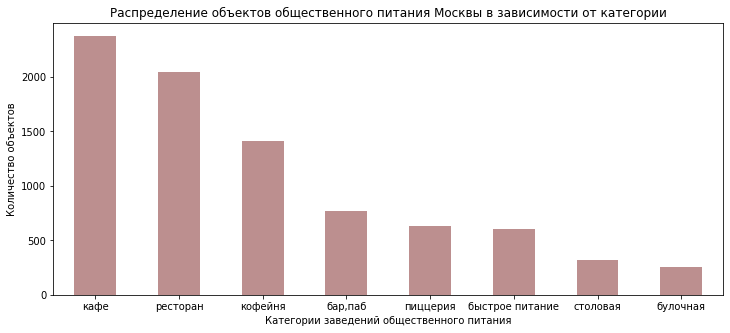

In [23]:
# Строим столбчатую диаграмму
new_df['category'].value_counts().plot(
               kind='bar',
               rot=0,
               legend=False,
               title=f'Распределение объектов общественного питания Москвы в зависимости от категории',
               figsize=(12, 5),
               grid=False,
               color='#BC8F8F'
)
# Настраиваем оформление графика
plt.xlabel('Категории заведений общественного питания')
plt.ylabel('Количество объектов')
# Выводим график
plt.show()

В данных представлены категории заведений кафе, ресторан, кофейня, бар,паб, пиццерия, быстрое питание, столовая и булочная. 
Кафе, ресторан находятся на 1 и 2 месте с почти равным кол-вом заведений, на 3 месте по количеству заведений - кофейни. 
Остальные категории не так распространены, особенно это касается столовых и булочных.

---

### Задача 2

Какие административные районы Москвы присутствуют в данных? Исследуйте распределение количества заведений по административным районам Москвы, а также отдельно распределение заведений каждой категории в Центральном административном округе Москвы. Результат сопроводите подходящими визуализациями.

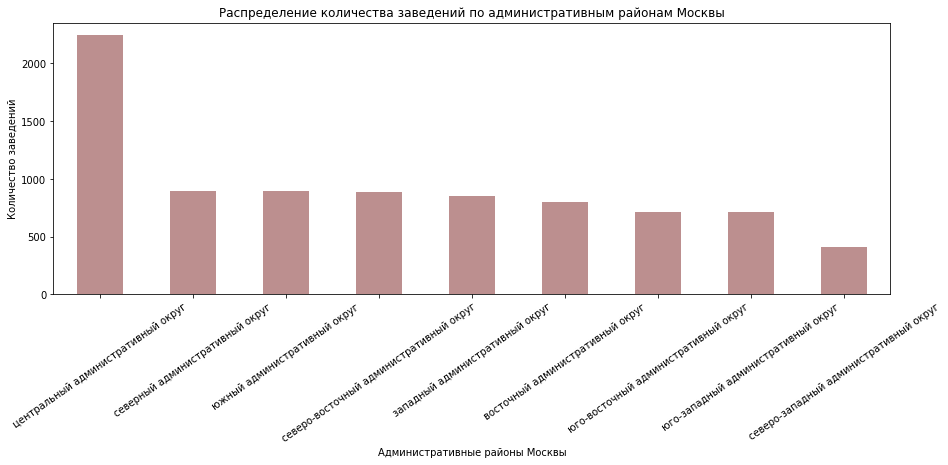

In [24]:
# Строим столбчатую диаграмму для распределения заведений по административным округам 
new_df['district'].value_counts().sort_values(ascending=False).plot(
               kind='bar', # Тип графика - столбчатая диаграмма
               rot=35, # Градус вращения подписи по оси Х
               legend=False, # Выключаем легенду
               title=f'Распределение количества заведений по административным районам Москвы',
               figsize=(15, 5),
               grid=False,
               color='#BC8F8F'
)

# Настраиваем оформление графика
plt.xlabel('Административные районы Москвы')
plt.ylabel('Количество заведений')
# Выводим график
plt.show()

В данных присутсвуют АО: Центральный, Северный, Северо-Восточный, Южный, Западный, Восточный, Юго-Западный, Юго-Восточный и Северо-Западный. Больше всего заведений находится в Центральном АО, в Северном, Северо-Восточном и Южном АО заведения распределены равномерно их около 700, а в остальных районах около 500-600, самое низкое количество заведений находится в Северно-Западном АО.

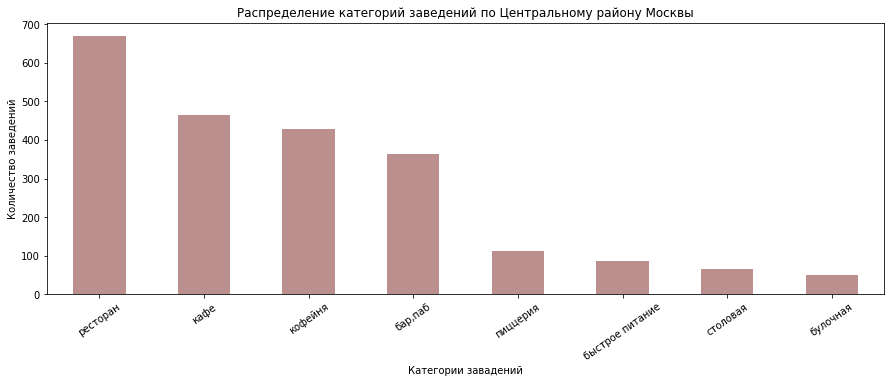

In [25]:
# Строим столбчатую диаграмму для распределения категорий заведений по Центральному АО Москвы
new_df.loc[new_df['district'] == 'центральный административный округ']['category'].value_counts().sort_values(ascending=False).plot(
               kind='bar', 
               rot=35, 
               legend=False, 
               title=f'Распределение категорий заведений по Центральному району Москвы',
               figsize=(15, 5),
               grid=False,
               color='#BC8F8F'
)

# Настраиваем оформление графика
plt.xlabel('Категории завадений')
plt.ylabel('Количество заведений')
# Выводим график
plt.show()

В Центральном АО наиболее распространены рестораны, кафе, кафейни и бары, пабы. На первом месте рестораны, а вот быстрое питание, столовые и булочные не так распространены. 

Из визуализаций можно сделать вывод, что больше всего заведений находится в Центральной АО, большая часть которых приходится на кафе, рестораны и кофейни. Булочные не так популярны, скорее всего потому-что в этом округе много туристов.

---

### Задача 3

Изучите соотношение сетевых и несетевых заведений в целом по всем данным и в разрезе категорий заведения. Каких заведений больше — сетевых или несетевых? Какие категории заведений чаще являются сетевыми? Исследуйте данные, ответьте на вопросы и постройте необходимые визуализации.

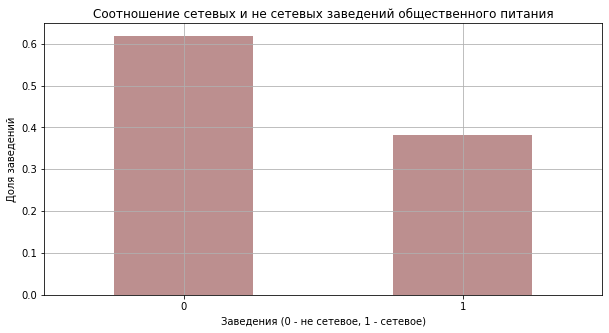

In [26]:
# Строим столбчатую диаграмму соотношения сетевых и не сетевых заведений
new_df['chain'].value_counts(normalize=True).sort_values(ascending=False).plot(
               kind='bar', 
               rot=0, 
               legend=False,
               title=f'Соотношение сетевых и не сетевых заведений общественного питания',
               figsize=(10, 5),
               grid=True,
               color='#BC8F8F'
)

# Настраиваем оформление графика
plt.xlabel('Заведения (0 - не сетевое, 1 - сетевое)')
plt.ylabel('Доля заведений')

# Выводим график
plt.show()

Не сетевых заведений примерно 60% от всех ресторанов, а сетевых 40%.

In [27]:
# Выведем данные в необходимые переменные
n1 = new_df.groupby('category')['chain'].count()

n2 = new_df.loc[new_df['chain'] == 1]

n2 = n2.groupby('category')['chain'].count()

n3 = n2/n1

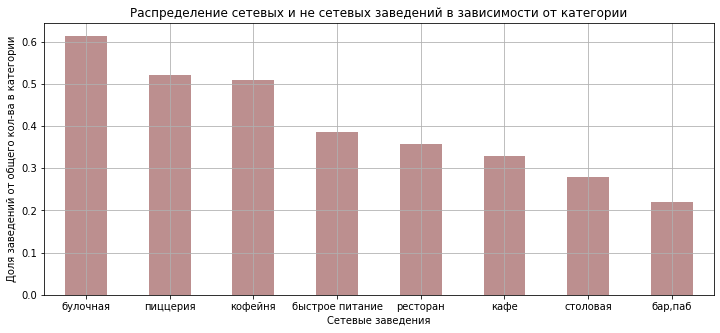

In [28]:
n3.sort_values(ascending=False).plot(
               kind='bar',
               title=f'Распределение сетевых и не сетевых заведений в зависимости от категории',
               ylabel='Доля заведений от общего кол-ва в категории',
               xlabel='Сетевые заведения',
               rot=0,
               figsize=(12, 5),
               legend=False,
               grid=True,
               color='#BC8F8F'
)

# Выводим график
plt.show()

Чаще всего сетевыми заведениями являются булочные, пицерии и кафейни в этих категориях кол-во таких заведений состовляет более половины. Кафе, столовые и бары чаще все не сетевые.



Не сетевых заведений в Москве больше всего они составляют 60% от общего кол-ва, чаще всего сетевыми являются булочные, кофенйи и пицерии. 

---

### Задача 4

Исследуйте количество посадочных мест в заведениях. Встречаются ли в данных аномальные значения или выбросы? Если да, то с чем они могут быть связаны? Приведите для каждой категории заведений наиболее типичное для него количество посадочных мест. Результат сопроводите подходящими визуализациями.


In [29]:
# Изучаем статистические показатели столбца seats 
print('Статистические показатели столбца seats:')
new_df['seats'].describe()

Статистические показатели столбца seats:


count    4792.000000
mean      108.361436
std       122.841130
min         0.000000
25%        40.000000
50%        75.000000
75%       140.000000
max      1288.000000
Name: seats, dtype: float64

Среднее число посадочных мест составляет примерно 108, что на 33 больше чем медианное значение, это говорит об ненормальном распределении данных. Минимальное число посадочных мест 0 - что вполне нормально, т.к. посадочные места могу отсутсвовать, а максимальное кол-во посадочных мест 1288, что может говорить о выбросах в данных, т.к. нормальным кол-во посадочных мест является 250. 75% всех данных ниже 140, что только подтверждает это.

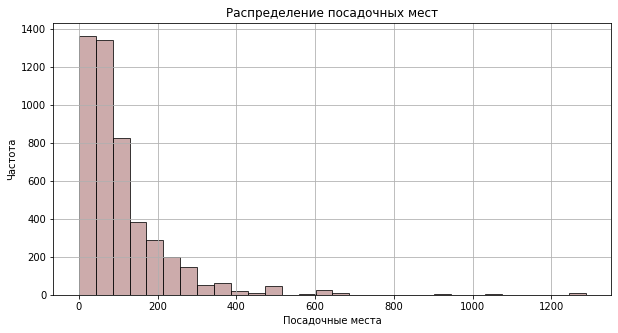

In [30]:
# Строим гистограмму распределения посадочных мест
new_df['seats'].sort_values(ascending=False).plot(
                kind='hist',
                bins=30,
                alpha=0.75,
                edgecolor='black',
                rot=0,
                figsize=(10, 5),
                grid=True,
                color='#BC8F8F'
)

# Настраиваем оформление графика
plt.title('Распределение посадочных мест')
plt.xlabel('Посадочные места')
plt.ylabel('Частота')

# Выводим график
plt.show()

Гистограмма имеет правый хвост, что говорит о том, что чаще всего присутствуют значения от 0 до 140-150, но есть выбросы в данных, которые являются нетипичными для этих данных. Построим диаграмму размаха и посмотрим на выбросы.

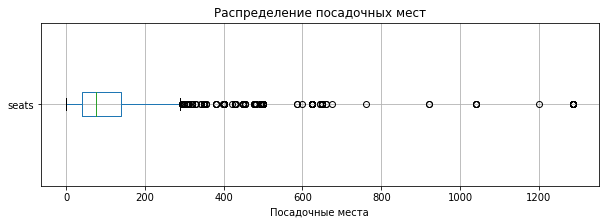

In [31]:
# Строим диаграмму размаха значений в столбце seats
new_df.boxplot(column='seats', vert=False, figsize=(10, 3))

# Добавляем заголовок и метки оси
plt.title('Распределение посадочных мест')
plt.xlabel('Посадочные места')

# Выводим график
plt.show()

Большинство данных находятся в диапазоне примерно от 40 до 150 посадочных мест, в данных есть выбросы. Значения больше 250 являются не типичными для этих данных. Далее рассмотрим распределение медианного кол-ва мест в зависимости от категории.

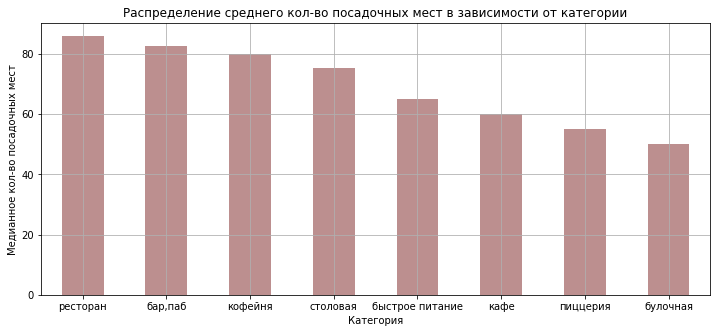

In [32]:

# Построим график столбчатой диаграммы
new_df.groupby('category')['seats'].median().sort_values(ascending=False).plot(
               kind='bar',
               title=f'Распределение среднего кол-во посадочных мест в зависимости от категории',
               legend=False,
               ylabel='Медианное кол-во посадочных мест',
               xlabel='Категория',
               rot=0,
               figsize=(12, 5),
               grid=True,
               color='#BC8F8F'
)

# Выводим график
plt.show()

Типичные кол-во посадочных мест для ресторанов является около 90, для баров, пабов - 80-85, для кофеейн 80, дальше в среднем в зависимости от категории кол-во посадочных мест падает на 5, для булочных с самым низким кол-вом посадочных мест типичным является значение 50, что является еормальным, т.к. оыбчно это заведения с малой площадью.

Из данных по столбцу `seats` можно сделать вывод, что есть аномально высокие значения, скорее всего это может быть связано с ошибками в данных, т.к. такое кол-во мест не характерно для заведений общественного питания.

---

### Задача 5

Исследуйте рейтинг заведений. Визуализируйте распределение средних рейтингов по категориям заведений. Сильно ли различаются усреднённые рейтинги для разных типов общепита?

In [33]:
# Изучаем статистические показатели столбца rating 
print('Статистические показатели столбца rating:')
new_df['rating'].describe()

Статистические показатели столбца rating:


count    8402.000000
mean        4.230017
std         0.470320
min         1.000000
25%         4.100000
50%         4.300000
75%         4.400000
max         5.000000
Name: rating, dtype: float64

В целом можно сделать вывод, что столбец `rating` имеет нормальное распределение, среднее почти не отличается от медианного значения.

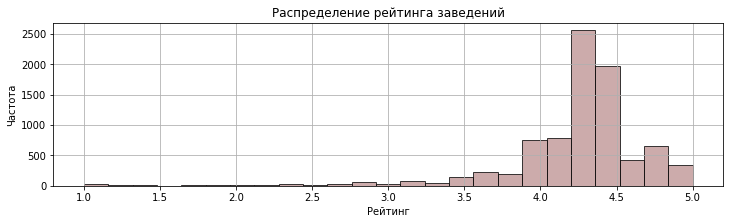

In [34]:
# Строим гистограмму по столбцу rating
new_df['rating'].sort_values(ascending=False).plot(
                kind='hist',
                bins=25, 
                alpha=0.75,
                edgecolor='black',
                rot=0, 
                figsize=(12, 3),
                grid=True,
                color='#BC8F8F'
)

# Настраиваем оформление графика
plt.title('Распределение рейтинга заведений')
plt.xlabel('Рейтинг')
plt.ylabel('Частота')

# Выводим график
plt.show()

Большинство значений расположены в диапазоне от 4-4,5, гистограма смещена вправо, что может говорить о слишком низких значениях.
Проверим распределение средних рейтингов в зависимости от категории.

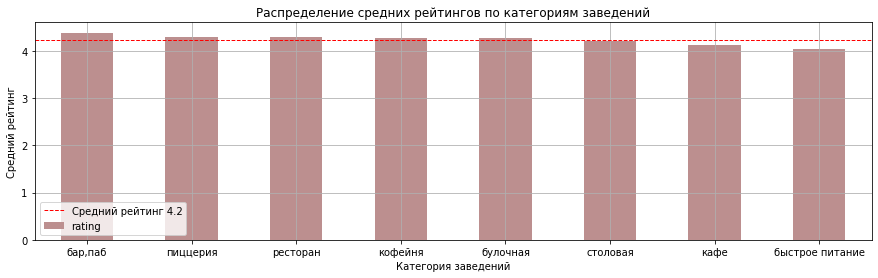

In [35]:
new_df.groupby('category')['rating'].mean().sort_values(ascending=False).plot(
               kind='bar',
               title=f'Распределение средних рейтингов по категориям заведений',
               legend=False,
               ylabel='Средний рейтинг',
               xlabel='Категория заведений',
               rot=0,
               figsize=(15, 4),
               grid=True,
               color='#BC8F8F'

)

# Рассчитываем среднее значение рейтинга по всем данным
mean_rating_share = new_df['rating'].mean()

# Наносим на график линию с средним значением рейтинга
plt.axhline(mean_rating_share, 
            color='red', 
            linestyle='--', 
            linewidth=1,
            label=f'Средний рейтинг {round(mean_rating_share,1)}'
           
           )

# Выводим график
plt.legend()
plt.show()

Из визуализации можно сделать вывод, что средний рейтинг категорий заведений не почти не отличается от общего среднего рейтинга по всем данным. 

Был проведен анализ рейтингов заведений, можно сделать вывод, что категория заведений, не сильно влияет на рейтинг, так как не слишком выходит выше или ниже среднего значения 4,2 для общих данных. В данных по этому столбцу есть минимальные значения 1, но не ниже единицы, что является нормальным для данных по рейтингу.

---

### Задача 6

Изучите, с какими данными показывают самую сильную корреляцию рейтинги заведений? Постройте и визуализируйте матрицу корреляции рейтинга заведения с разными данными: его категория, положение (административный район Москвы), статус сетевого заведения, количество мест, ценовая категория и признак, является ли заведения круглосуточным. Выберите самую сильную связь и проверьте её.

In [36]:
# Вычисляем корреляционную матрицу с использованием phi_k
correlation_matrix = new_df[['district', 'category', 'chain', 'seats', 'price', 'is_24_7', 'rating']].phik_matrix()

correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)

interval columns not set, guessing: ['chain', 'seats', 'rating']


,rating
price,0.220295
district,0.200761
category,0.189677
is_24_7,0.150365
chain,0.107973
seats,0.000000


Самое высокую кореляцию значения рейтинда имеют с категорией цен и административным округом, посмотрим тепловую карту, для наглядного представления данных.

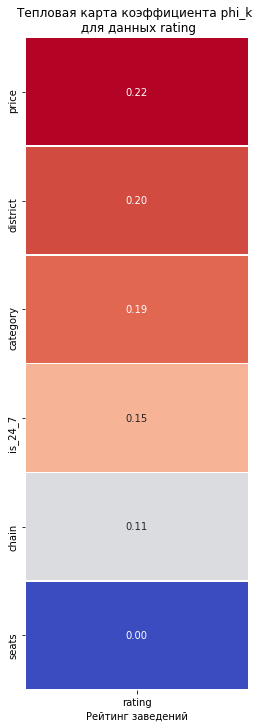

In [37]:
# Строим тепловую карту
plt.figure(figsize=(4, 12))

# Сохраняем матрицу корреляции признака rating с другими признаками 
data_heatmap = correlation_matrix.loc[correlation_matrix.index != 'rating'][['rating']].sort_values(by='rating', ascending=False)
sns.heatmap(data_heatmap,
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            linewidths=0.5,
            cbar=False
           )

# Добавляем заголовок и подпись по оси Х
plt.title('Тепловая карта коэффициента phi_k \n для данных rating')
plt.xlabel('Рейтинг заведений')

# Выводим график
plt.show()

Из тепловой матрицы выберем категорию цен, так как наибольшую кареляцию значения рейтинга имеют с этими данными. Построим столбчатую диаграмму чтобы проверить связь.

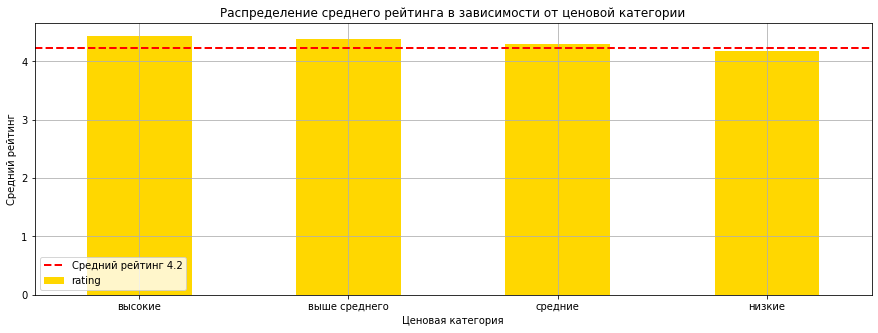

In [38]:
# Строим график столбчатой диаграммы
new_df.groupby('price')['rating'].mean().sort_values(ascending=False).plot(
               kind='bar',
               title=f'Распределение среднего рейтинга в зависимости от ценовой категории',
               legend=True,
               ylabel='Средний рейтинг',
               xlabel='Ценовая категория',
               rot=0,
               figsize=(15, 5),
               color='#FFD700'
)

# Рассчитываем среднее значение для рейтинга
mean_rating_share = new_df['rating'].mean()

# Наносим на график линию с средним значением рейтинга
plt.axhline(mean_rating_share, 
            color='red', 
            linestyle='--', 
            linewidth=2, 
            label=f'Средний рейтинг {round(mean_rating_share,1)}')

plt.grid()
plt.legend()

# Выводим график
plt.show()

Из визуализации можно сделать вывод, что есть слабая связь в увелечении рейтинга в зависимости от категории цены - чем выше категория цен, тем выше рейтинг заведения. 

Была построена матрица кореляции, и найдены слабые связи рейтинга с административным районом и категорией цен. Для проверки связи была построена столбчатая диаграмма, из которой был сделан вывод, что есть слабая связь с тем, что чем выше категория цен, тем выше рейтинг заведения.

---

### Задача 7

Сгруппируйте данные по названиям заведений и найдите топ-15 популярных сетей в Москве. Для них посчитайте значения среднего рейтинга. Под популярностью понимается количество заведений этой сети в регионе. К какой категории заведений они относятся? Результат сопроводите подходящими визуализациями.

In [39]:
# зададим переменную для датасета с сетевыми заведениями
top_15 = new_df.loc[new_df['chain'] == 1]

In [40]:
# сгруппируем данные и посчитаем кол-во сетевых ресторанов и их средний рейтин и выведем топ 15
top_chain_df = top_15.groupby('name').agg({'id' : 'count', 'rating' : 'mean'}).sort_values(by='id', ascending=True)

top_chain_df = top_chain_df.iloc[-15:]

# скопируем данные и поменяем настройки, чтобы по порядку шли как в топе
top_mean_df = top_15.groupby('name').agg({'id' : 'count', 'rating' : 'mean'}).sort_values(by='id', ascending=False).head(15)

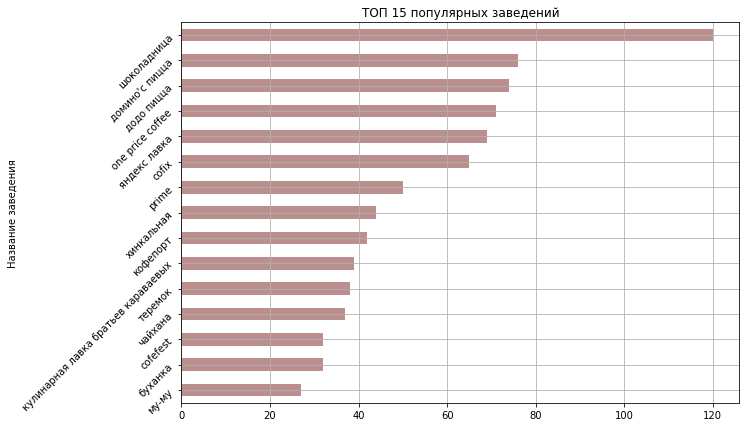

In [41]:
# выведем линейчатую диаграмму топ 15 сетевых заведений
top_chain_df.plot(
            kind='barh',
            y='id',
            title=f'ТОП 15 популярных заведений',
               legend=False,
               ylabel='Средний рейтинг',
               xlabel='Название заведения',
               rot=45,
               figsize=(10, 7),
               grid=True,
               color='#BC8F8F'
            
)

plt.show()

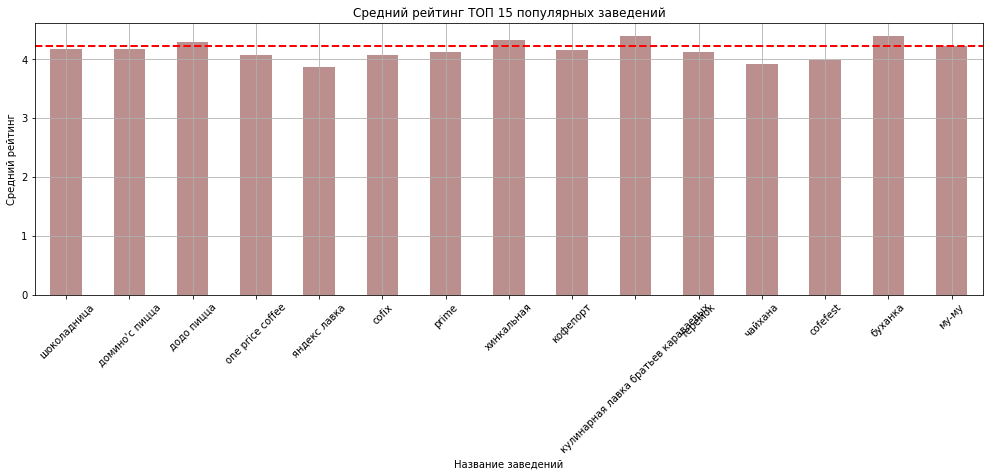

In [42]:
# построим столбчатую диаграмму по порядку топа средних рейтингов заведений
top_mean_df.plot(
            kind='bar',
            y='rating',
            title=f'Средний рейтинг ТОП 15 популярных заведений',
               legend=False,
               ylabel='Средний рейтинг',
               xlabel='Название заведений',
               rot=45,
               figsize=(17, 5),
               grid=True,
               color='#BC8F8F'
            
)

# Рассчитываем среднее значение для рейтинга
mean_top_rating = top_15['rating'].mean()

# Наносим на график линию с средним значением рейтинга
plt.axhline(mean_top_rating, 
            color='red', 
            linestyle='--', 
            linewidth=2, 
            label=f'Средний рейтинг {round(mean_top_rating,2)}')

plt.show()

Топ-5 по кол-ву заведений являются: Шоколадница, Доминос Пицца, Додо Пиццы, One Price Coffee и Yandex Лавка. "Шоколадница" является самым популярным сетевым заведением в Москве с рейтингом 4,17, а на последнем месте в топ-15 "Му-Му" с рейтингом 4,22.


---

### Задача 8

Изучите вариацию среднего чека заведения (столбец `middle_avg_bill`) в зависимости от района Москвы. Проанализируйте цены в Центральном административном округе и других. Как удалённость от центра влияет на цены в заведениях? Результат сопроводите подходящими визуализациями.


Сгруппируем данные по административному округу и найдем средний чек для каждого АО.

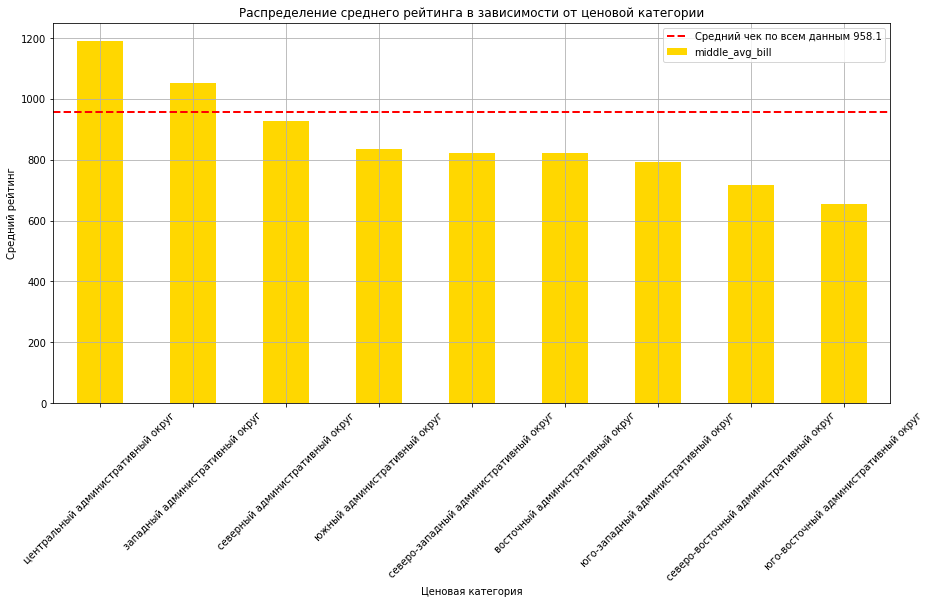

In [43]:
new_df.groupby('district')['middle_avg_bill'].mean().sort_values(ascending=False).plot(
               kind='bar',
               title=f'Распределение среднего рейтинга в зависимости от ценовой категории',
               legend=True,
               ylabel='Средний рейтинг',
               xlabel='Ценовая категория',
               rot=45,
               figsize=(15, 7),
               color='#FFD700'
)

# Рассчитываем среднее значение для рейтинга
mean_bill_share = new_df['middle_avg_bill'].mean()

# Наносим на график линию с средним значением рейтинга
plt.axhline(mean_bill_share, 
            color='red', 
            linestyle='--', 
            linewidth=2, 
            label=f'Средний чек по всем данным {round(mean_bill_share,1)}')

plt.grid()
plt.legend()

# Выводим график
plt.show()

Из визуализации можно сделать вывод, что самый высокий средний чек в Центральном и Западном АО, там значения выше 957 руб. по всем данным. А дальше по удалению от Центрального АО средний чек падает, чем восточнее, тем средний чек ниже.

---

### Промежуточный вывод

Обобщите полученные результаты, выделив, по вашему мнению, самые важные.

В ходе исследования данных были посмотроены визуализации и построена матрица кореляции рейтинга. Больше всего заведений общественного питания состредоточено в Центральном Административном Районе. Большой популярностью пользуются кафе, кофейни, рестораны и пабы. По всем данным можно сделать вывод, что 60% заведений - не сетевые. Большая часть заведений имеет кол-во посадочных мест в диапазоне 40-150. Для ресторанов, кафе типичным является кол-во посадочным мест примерно 90 -80. Для остальных категорий значения ниже. 

Так же была построена матрица кореляции для рейтинга и обнаружены слабые связи с ценовой категорией и административным районом. Была проверена связь с ценовой категорией и выяснилось, что рейтинг заведение имеет слабую зависимость к повышению, если средний чек в заведении высокий.

А так же был выведен топ-15 сетевых заведений и сделан вывод, что чем восточнее и удаленнее от Центарального административного округа, тем средний чек ниже.

## 4. Итоговый вывод и рекомендации

По результатам проведённого исследовательского анализа данных сформулируйте итоговый вывод и рекомендации для заказчика. Старайтесь акцентировать внимание на ключевых моментах исследования.

При составлении вывода придерживайтесь такой структуры:

1. Общий обзор проделанной работы.
2. Ответы на исследовательские вопросы, или главные выводы.
3. Рекомендации на основе анализа данных.

1. В ходе работы были загружены необходимые для работы и визуализации библиоткети,  выгружена основная информация о датасетах `/datasets/rest_info.csv` и `/datasets/rest_price.csv` и подготовлен объедененный датасет. Удалены пропуски в столбце `hours` и удалены дублирующие строки. Так же был оптимизирован столбец `chain` и приведен к типу `int8`. И создана копия основного датасета для дальнейшей работы. 
- Проведен исследовательский анализ данных: исследованы категории заведений общественного питания, распределение заведений общественного питания по административным районам, изучены данные в столбцах `seats`, `rating`; построена матрица корреляция столбца `rating` с другими столбцами и найдены взаимосвязи, а также проведен анализ со столбцом `price`. Изучены сетевые заведения общественного питания, их рейтинг, выведен топ-15 сетевых заведений по популярности. 

2. В данных представлены категории заведений кафе, ресторан, кофейня, бар,паб, пиццерия, быстрое питание, столовая и булочная. Кафе, ресторан находятся на 1 и 2 месте с почти равным кол-вом заведений, на 3 месте по количеству заведений - кофейни. Остальные категории не так распространены, особенно это касается столовых и булочных. 

- Из визуализаций можно сделать вывод, что больше всего заведений находится в Центральной АО, большая часть которых приходится на кафе, рестораны и кофейни. Булочные не так популярны, скорее всего потому-что в этом округе много туристов.

- Большая часть не сетевых заведений приходится на бары, пабы, столовые, рестораны, кафе и быстрое питание в этих категориях больше половины заведений не сетевые, в то время как булочные чаще являются сетевыми, кофейни и пицерии примерно в помолам являются и сетевыми и не сетевыми. 
Не сетевых заведений в Москве больше всего они составляют 60% от общего кол-ва, чаще всего сетевыми являются булочные, кофенйи и пицерии. 

- Типичные кол-во посадочных мест для ресторанов является около 90, для баров, пабов - 80-85, для кофеейн 80, дальше в среднем в зависимости от категории кол-во посадочных мест падает на 5, для булочных с самым низким кол-вом посадочных мест типичным является значение 50, что является еормальным, т.к. оыбчно это заведения с малой площадью.
- Из данных по столбцу `seats` можно сделать вывод, что есть аномально высокие значения, скорее всего это может быть связано с ошибками в данных, т.к. такое кол-во мест не характерно для заведений общественного питания.


- Был проведен анализ рейтингов заведений, можно сделать вывод, что категория заведений, не сильно влияет на рейтинг, так как не слишком выходит выше или ниже среднего значения 4,2 для общих данных. В данных по этому столбцу есть минимальные значения 1, но не ниже единицы, что является нормальным для данных по рейтингу.


- Топ-5 по кол-ву заведений являются: Шоколадница, Доминос Пицца, Додо Пиццы, One Price Coffee и Yandex Лавка. "Шоколадница" является самым популярным сетевым заведением в Москве с рейтингом 4,17, а на последнем месте в топ-15 "Му-Му" с рейтингом 4,22.


- Из визуализации можно сделать вывод, что самый высокий средний чек в Центральном и Западном АО, там значения выше 957 руб. по всем данным. А дальше по удалению от Центрального АО средний чек падает, чем восточнее, тем средний чек ниже.

3. Из предоставленных данных, можно сделать вывод, что наиболее бодходящий округ для открытия заведение Центральный или Западный, там больше всего завадений типа ресторан, бар или паб, кафе пользуются популярностью. В целом распределение среднего рейтинга не показало сильной разницы по популярности категорий, но в районах благополучных для открытия на первом месте спросом пользуются ресторны и кафе, бары на 3 месте. Из построеной матрицы также можно сделать вывод, что у рестораны с высоким средним чеком пользуются популярностью и у них хорошие оценки в Яндекс Картах. Если выбирать из сетевых или не сетевых заведений, большим спросом пользуются не сетевые заведения их больше всего, а в топ-15 сетевых входят кафейни, пицерии и быстрое питание. Для ресторани, кафе и баров колчиество посадочных мест типичным являются значение от 80 до 90. 